In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv("realtor-data.csv")

In [8]:
data

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
813154,for_sale,1600000.0,2.0,2.0,NaN,"235 E 87th St Apt 5C, Manhattan, NY, 10128",235 E 87th St Apt 5C,Manhattan,New York,10128.0,NaN,2019-01-09
813155,for_sale,699000.0,4.0,2.0,0.04,"107 77th St, North Bergen, NJ, 07047",107 77th St,North Bergen,New Jersey,7047.0,NaN,2006-08-09
813156,for_sale,480000.0,2.0,1.0,NaN,"67-76 Booth St Unit 8O, Forest Hills, NY, 11375",67-76 Booth St Unit 8O,Forest Hills,New York,11375.0,1250.0,2014-08-06
813157,for_sale,450000.0,1.0,1.0,NaN,"34-41 85 St Unit 1J, Jackson Heights, NY, 11372",34-41 85 St Unit 1J,Jackson Heights,New York,11372.0,827.0,2020-02-04


In [6]:
data.isna().sum()

status               0
price               71
bed             122799
bath            112560
acre_lot        212917
full_address         0
street            1623
city                72
state                0
zip_code           204
house_size      251871
sold_date       419767
dtype: int64

In [7]:
data.status.value_counts()

for_sale          811566
ready_to_build      1593
Name: status, dtype: int64

In [16]:
data = data.dropna()

In [17]:
data.head()

,status,price,bed,bath,acre_lot,city,state,house_size,sold_date
829,for_sale,110000.0,7.0,3.0,0.09,Dorado,Puerto Rico,1192.0,2019-06-28
3380,for_sale,110000.0,7.0,3.0,0.09,Dorado,Puerto Rico,1192.0,2019-06-28
5083,for_sale,110000.0,7.0,3.0,0.09,Dorado,Puerto Rico,1192.0,2019-06-28
5387,for_sale,110000.0,7.0,3.0,0.09,Dorado,Puerto Rico,1192.0,2019-06-28
9053,for_sale,110000.0,7.0,3.0,0.09,Dorado,Puerto Rico,1192.0,2019-06-28


In [23]:
useful = data[data["status"]=="for_sale"]

In [25]:
useful.status.value_counts()

for_sale    214876
Name: status, dtype: int64

In [26]:
data.state.value_counts()

New Jersey        52525
Massachusetts     51961
Connecticut       44923
New York          18268
Rhode Island      12996
New Hampshire     10163
Pennsylvania       9937
Vermont            8381
Maine              4421
Delaware           1275
Puerto Rico          20
Virgin Islands        6
Name: state, dtype: int64

In [27]:
d1 = data.groupby('state').sum()

In [28]:
d1

,price,bed,bath,acre_lot,house_size
state,,,,,
Connecticut,2.208690e+10,165103.0,114574.0,68066.78,93516599.0
Delaware,4.314495e+08,4208.0,3000.0,3427.50,2553269.0
Maine,2.121486e+09,15754.0,10092.0,22566.08,9227172.0
Massachusetts,5.302575e+10,193105.0,141604.0,67733.57,128465925.0
New Hampshire,6.341967e+09,34504.0,25070.0,40858.59,24460618.0
New Jersey,2.988328e+10,186259.0,139131.0,577103.49,128286318.0
New York,2.410484e+10,71927.0,52461.0,36778.27,40980666.0
Pennsylvania,3.820694e+09,32765.0,22319.0,3081.35,17757191.0
Puerto Rico,2.200000e+06,140.0,60.0,1.80,23840.0


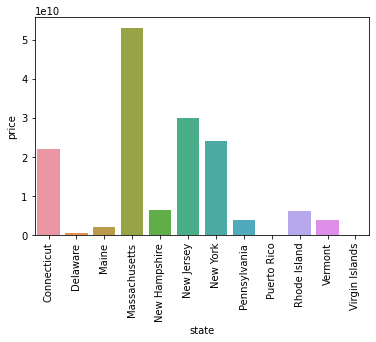

In [31]:
ax = sns.barplot(data=d1,x=d1.index,y="price")
ax.set_xticklabels(d1.index, rotation=90)
plt.show()

In [36]:
data['house_size'].describe()

count    214876.000000
mean       2291.476396
std        1969.248279
min         170.000000
25%        1320.000000
50%        1830.000000
75%        2650.000000
max       70626.000000
Name: house_size, dtype: float64

In [37]:
data['price'].describe()

count    2.148760e+05
mean     7.073671e+05
std      1.293926e+06
min      1.000000e+04
25%      2.850000e+05
50%      4.299000e+05
75%      7.000000e+05
max      6.000000e+07
Name: price, dtype: float64

In [40]:
data['price'].corr(data["house_size"])

0.44371174125637

In [41]:
d1.columns

Index(['price', 'bed', 'bath', 'acre_lot', 'house_size'], dtype='object')

<AxesSubplot:>

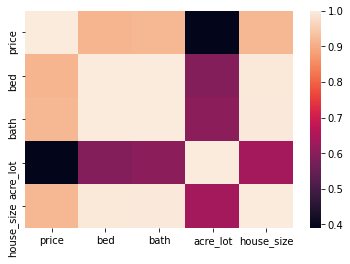

In [42]:
sns.heatmap(d1.corr())